## 01. Entedendo o problema

In [1]:
# Importando bibliotecas
import pandas as  pd 
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import openpyxl

In [10]:
dados = pd.read_csv(r'C:\Users\init\Documents\GitHub\Estudos-praticos\SERIES\data\clientes_restaurantes.csv')
dados.head()

,data,Chimi & Churri,Assa Frão
0,1/1/2016,65.0,139.0
1,1/2/2016,24.0,85.0
2,1/3/2016,24.0,81.0
3,1/4/2016,23.0,32.0
4,1/5/2016,2.0,43.0


In [11]:
dados.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            478 non-null    object 
 1   Chimi & Churri  476 non-null    float64
 2   Assa Frão       477 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.3+ KB


In [12]:

# transformação de colunas de data para datetime
dados['data'] = pd.to_datetime(dados['data'])
dados.set_index('data', inplace=True)

In [13]:
dados

,Chimi & Churri,Assa Frão
data,,
2016-01-01,65.0,139.0
2016-01-02,24.0,85.0
2016-01-03,24.0,81.0
2016-01-04,23.0,32.0
2016-01-05,2.0,43.0
...,...,...
2017-04-18,30.0,18.0
2017-04-19,20.0,18.0
2017-04-20,22.0,46.0


In [14]:
# Verificando dados nulos por linhas
dados['Chimi & Churri'][dados['Chimi & Churri'].isnull()]

data
2016-04-05   NaN
2016-09-17   NaN
Name: Chimi & Churri, dtype: float64

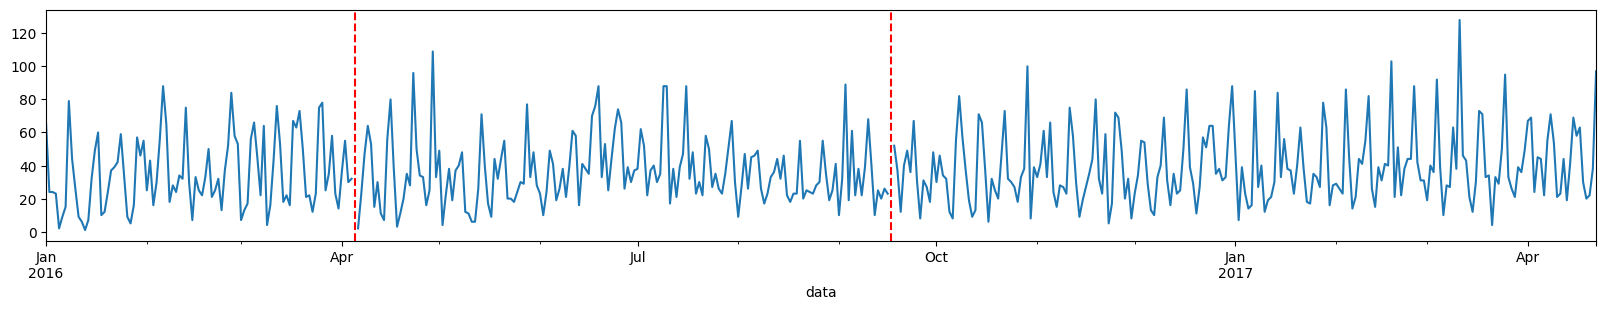

In [15]:
# Visualizando dados nulos atraves de grafico com axvline

dados['Chimi & Churri'].plot(figsize=(20,3))
plt.axvline(x = dados['Chimi & Churri'][dados['Chimi & Churri'].isnull()].index[0], color='red', linestyle='--')
plt.axvline(x = dados['Chimi & Churri'][dados['Chimi & Churri'].isnull()].index[1], color='red', linestyle='--');

In [16]:
dados['Assa Frão'][dados['Assa Frão'].isnull()]

data
2016-11-24   NaN
Name: Assa Frão, dtype: float64

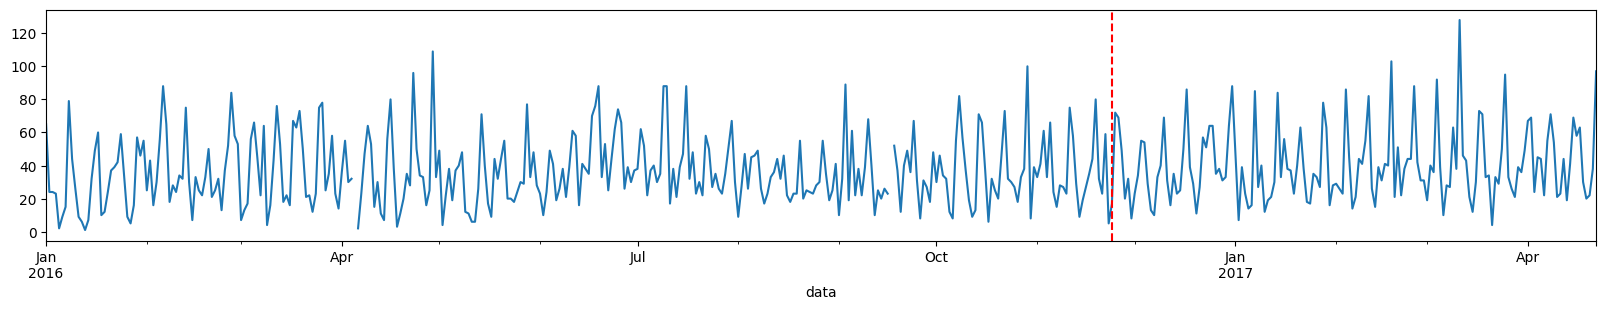

In [17]:
dados['Chimi & Churri'].plot(figsize=(20,3))
plt.axvline(x = dados['Assa Frão'][dados['Assa Frão'].isnull()].index[0], color='red', linestyle='--')


In [18]:
## Preenchimento de dados nulos com interpolação linear
dados = dados.interpolate().round()

In [19]:
# Verificando se os dados nulos foram preenchidos com interpolação
dados.loc['2016-04-04':'2016-04-06']

,Chimi & Churri,Assa Frão
data,,
2016-04-04,32.0,12.0
2016-04-05,17.0,34.0
2016-04-06,2.0,40.0


In [20]:
# resultado esperado, porem com decimal, como é uma contagem de clientes, arredondamos para inteiro
dados.loc['2016-09-16':'2016-09-18']

,Chimi & Churri,Assa Frão
data,,
2016-09-16,23.0,51.0
2016-09-17,38.0,60.0
2016-09-18,52.0,57.0


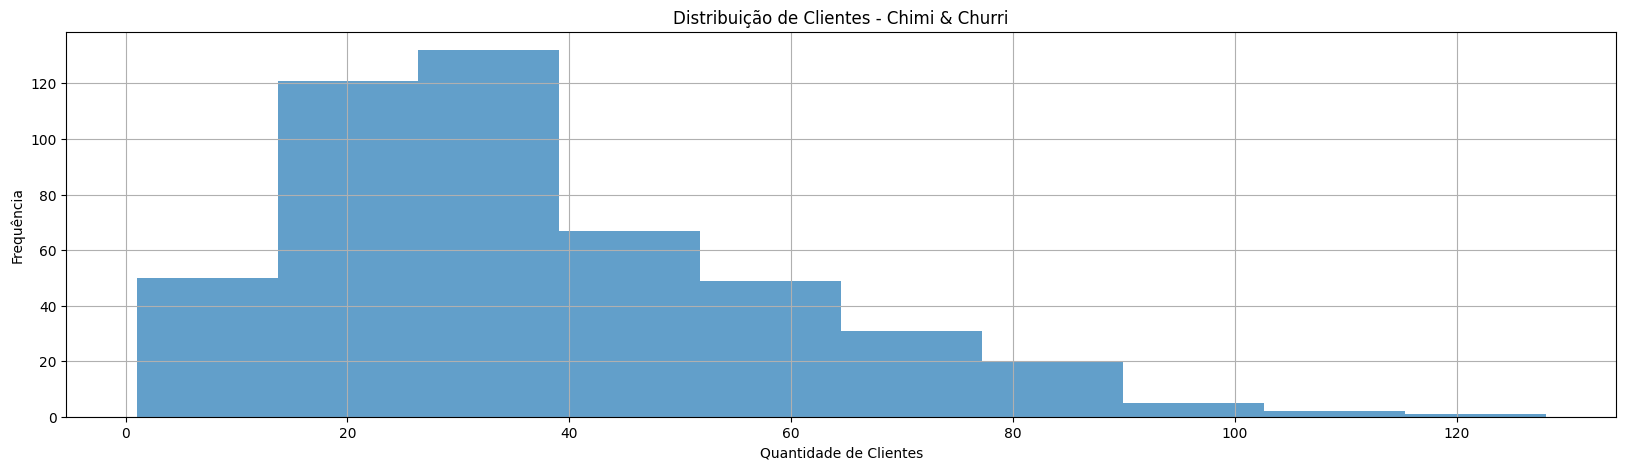

In [21]:
# Perguntas a responder
# * Quais são os dias com maior frequencia de clientes para cada restaurante?
# * Qual é a quantidade minima que visitam ?
# * Qual é a máxima de clientes por dia para cada restaurante?

dados['Chimi & Churri'].hist(figsize=(20,5),alpha=0.7)
plt.title('Distribuição de Clientes - Chimi & Churri')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Frequência')
plt.show()

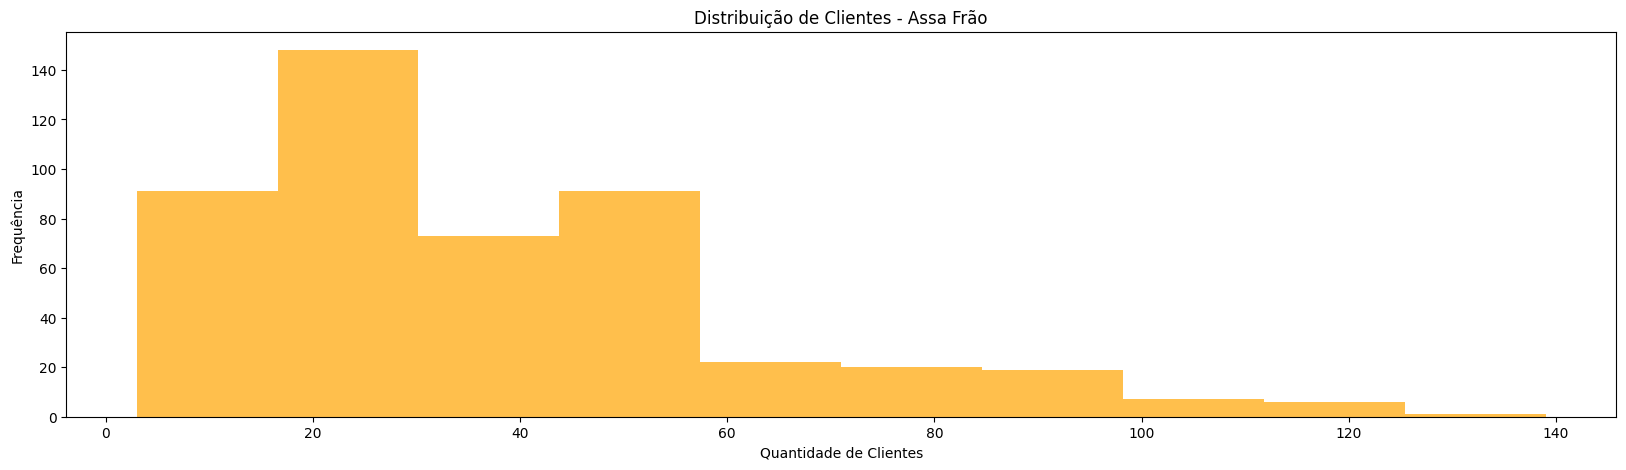

In [22]:
plt.figure(figsize=(20,5))
plt.hist(dados['Assa Frão'],alpha=0.7, color='orange')
plt.title('Distribuição de Clientes - Assa Frão')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Frequência')
plt.show()

In [23]:
dados.describe()

,Chimi & Churri,Assa Frão
count,478.000000,478.000000
mean,37.453975,37.679916
std,21.433065,24.619708
min,1.000000,3.000000
25%,22.250000,19.000000
50%,33.000000,30.500000
75%,49.000000,50.000000
max,128.000000,139.000000


In [24]:
print(f'Máximo de clientes em Chimi & Churri: {dados["Chimi & Churri"].max()}')
print(f'Mínimo de clientes em Chimi & Churri: {dados["Chimi & Churri"].min()}')
print(f'Máximo de clientes em Assa Frão: {dados["Assa Frão"].max()}')
print(f'Mínimo de clientes em Assa Frão: {dados["Assa Frão"].min()}')

Máximo de clientes em Chimi & Churri: 128.0
Mínimo de clientes em Chimi & Churri: 1.0
Máximo de clientes em Assa Frão: 139.0
Mínimo de clientes em Assa Frão: 3.0


C:\Users\init\AppData\Local\Temp\ipykernel_3516\1301076062.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dados['Chimi & Churri'], dados['Assa Frão']], labels=['Chimi & Churri', 'Assa Frão'])


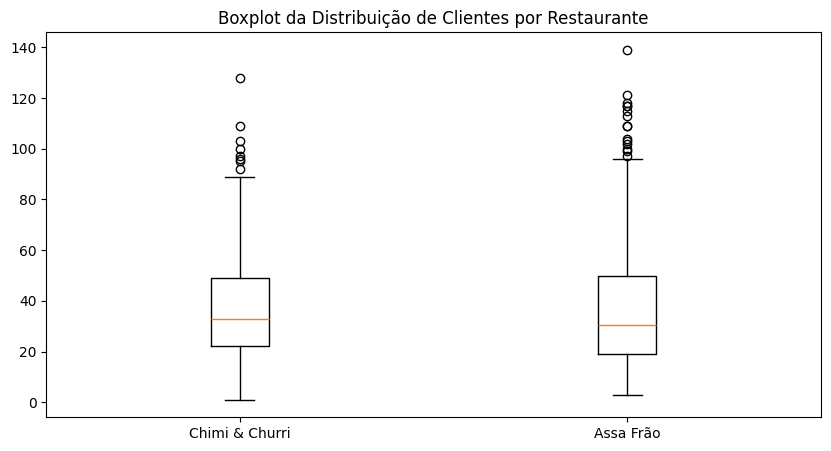

In [25]:
plt.figure(figsize=(10,5))
plt.boxplot([dados['Chimi & Churri'], dados['Assa Frão']], labels=['Chimi & Churri', 'Assa Frão'])
plt.title('Boxplot da Distribuição de Clientes por Restaurante')
plt.show()

## 02. Extraindo insights

In [26]:
# verificar o valor médio, maximo e minimo de clientes por juntando os dois restaurantes
dados['Total'] = dados['Chimi & Churri'] + dados['Assa Frão']
dados['Total']

data
2016-01-01    204.0
2016-01-02    109.0
2016-01-03    105.0
2016-01-04     55.0
2016-01-05     45.0
              ...  
2017-04-18     48.0
2017-04-19     38.0
2017-04-20     68.0
2017-04-21     76.0
2017-04-22    156.0
Name: Total, Length: 478, dtype: float64

In [27]:
print(f'Maximo de clientes em ambos os restaurantes: {dados['Total'].max()}')
print(f'Minimo de clientes em ambos os restaurantes: {dados['Total'].min()}')
print(f'Média de clientes em ambos os restaurantes: {dados['Total'].mean():.0f}')

Maximo de clientes em ambos os restaurantes: 205.0
Minimo de clientes em ambos os restaurantes: 15.0
Média de clientes em ambos os restaurantes: 75


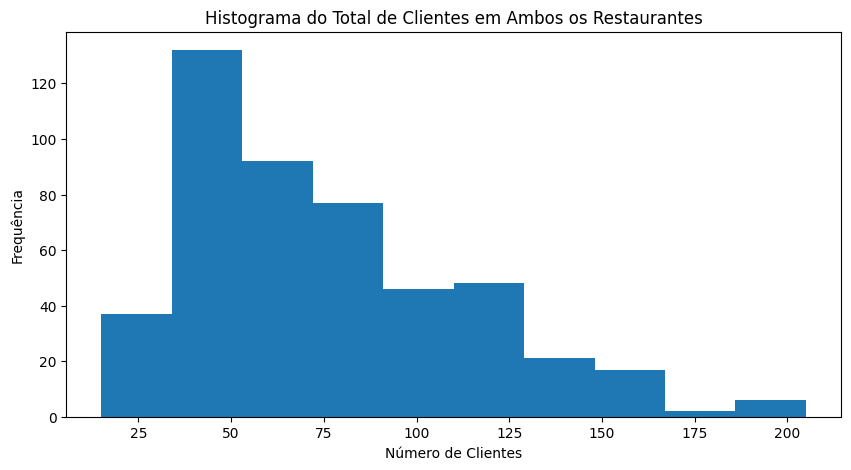

In [28]:
plt.figure(figsize=(10,5))
plt.hist(dados['Total'])
plt.title('Histograma do Total de Clientes em Ambos os Restaurantes')
plt.xlabel('Número de Clientes')
plt.ylabel('Frequência')
plt.show()

In [29]:
dados.describe()    

,Chimi & Churri,Assa Frão,Total
count,478.000000,478.000000,478.000000
mean,37.453975,37.679916,75.133891
std,21.433065,24.619708,37.514146
min,1.000000,3.000000,15.000000
25%,22.250000,19.000000,45.000000
50%,33.000000,30.500000,66.500000
75%,49.000000,50.000000,99.000000
max,128.000000,139.000000,205.000000


In [30]:
from matplotlib import dates

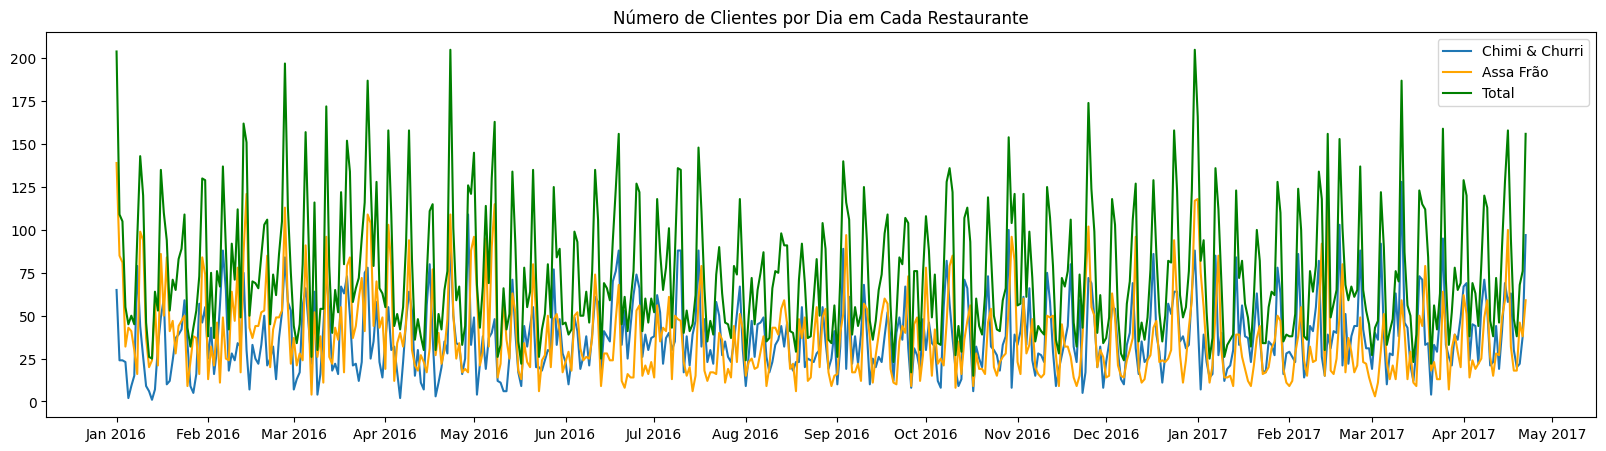

In [31]:
plt.figure(figsize=(20,5))
plt.plot(dados['Chimi & Churri'], label='Chimi & Churri')
plt.plot(dados['Assa Frão'], label='Assa Frão', color='orange')
plt.plot(dados['Total'], label='Total', color='green')
plt.title('Número de Clientes por Dia em Cada Restaurante')

# Obter o Axes atual e atribuir a 'ax'
ax = plt.gca() 

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

plt.legend()
plt.show()

In [32]:
# Ecnontrando a quantidade de clientes mensais de cada restaurante
clientes_mensais = dados.resample(rule='ME')[['Chimi & Churri', 'Assa Frão']].sum()
clientes_mensais

,Chimi & Churri,Assa Frão
data,,
2016-01-31,920.0,1577.0
2016-02-29,1109.0,1396.0
2016-03-31,1177.0,1513.0
2016-04-30,1089.0,1229.0
2016-05-31,957.0,1338.0
2016-06-30,1262.0,914.0
2016-07-31,1299.0,986.0
2016-08-31,972.0,944.0
2016-09-30,1038.0,1084.0


In [33]:
# traduzindo os nomes dos meses para português
clientes_mensais.index.month_name(locale = 'pt_BR.UTF-8')

Index(['Janeiro', 'Fevereiro', 'Marã§o', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Janeiro',
       'Fevereiro', 'Marã§o', 'Abril'],
      dtype='object', name='data')

In [34]:
clientes_mensais['Mês'] = clientes_mensais.index.month_name(locale = 'pt_BR.UTF-8')
clientes_mensais

,Chimi & Churri,Assa Frão,Mês
data,,,
2016-01-31,920.0,1577.0,Janeiro
2016-02-29,1109.0,1396.0,Fevereiro
2016-03-31,1177.0,1513.0,Marã§o
2016-04-30,1089.0,1229.0,Abril
2016-05-31,957.0,1338.0,Maio
2016-06-30,1262.0,914.0,Junho
2016-07-31,1299.0,986.0,Julho
2016-08-31,972.0,944.0,Agosto
2016-09-30,1038.0,1084.0,Setembro


In [35]:
import matplotlib.ticker as ticker

C:\Users\init\AppData\Local\Temp\ipykernel_3516\289386857.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016', '\n\n2017']))


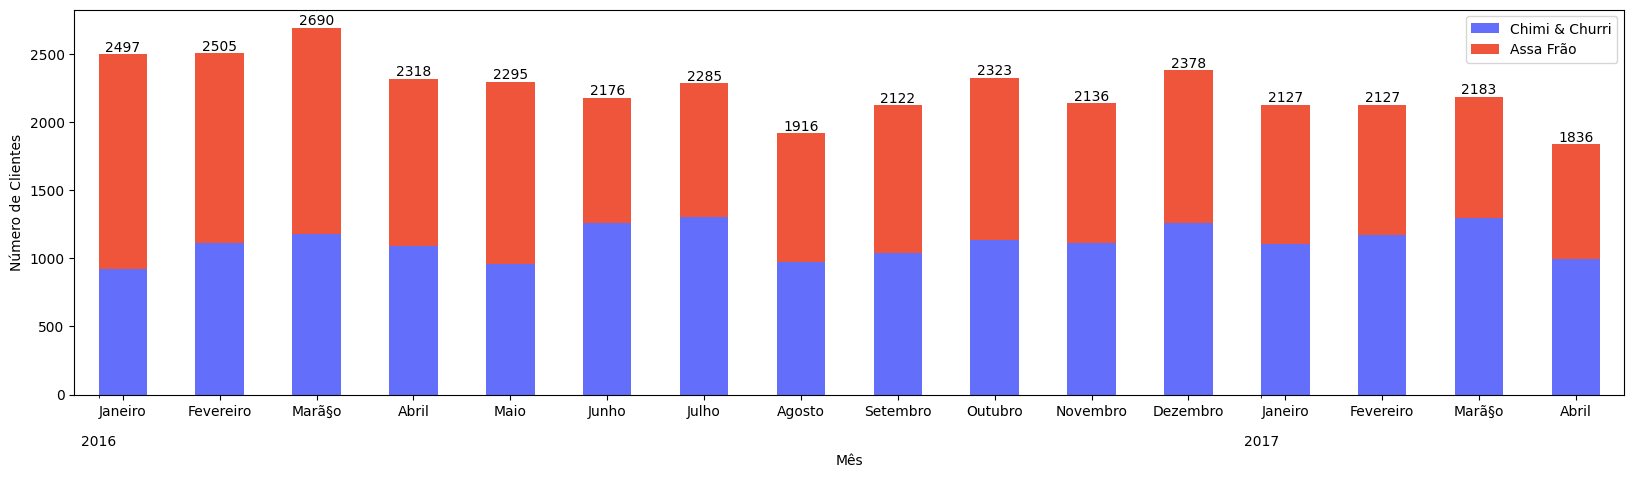

In [36]:
ax = clientes_mensais.plot(x='Mês', figsize=(20,5), kind='bar', stacked=True, color = ['#636EFA', '#EF553B'],rot=0)
ax.bar_label(ax.containers[1])
ax.xaxis.set_minor_locator(ticker.IndexLocator(12, 0))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['\n\n2016', '\n\n2017']))
plt.ylabel('Número de Clientes')
plt.show()

In [37]:
# Extraindo a média móvel de 7 dias para cada restaurante
for restaurante in ['Chimi & Churri', 'Assa Frão']:
    dados[f'{restaurante}_MM7'] = dados[restaurante].rolling(7).mean()

In [38]:
dados
# ha valores Nulos pois não há dados suficientes para calcular a média móvel nos primeiros dias

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7
data,,,,,
2016-01-01,65.0,139.0,204.0,NaN,NaN
2016-01-02,24.0,85.0,109.0,NaN,NaN
2016-01-03,24.0,81.0,105.0,NaN,NaN
2016-01-04,23.0,32.0,55.0,NaN,NaN
2016-01-05,2.0,43.0,45.0,NaN,NaN
...,...,...,...,...,...
2017-04-18,30.0,18.0,48.0,46.285714,44.714286
2017-04-19,20.0,18.0,38.0,42.857143,43.285714
2017-04-20,22.0,46.0,68.0,43.285714,46.000000


In [39]:
px.line(dados, x=dados.index, 
        y=['Chimi & Churri_MM7', 'Assa Frão_MM7'], 
        width = 1150,
        height = 400,
        title = 'Média Móvel de 7 Dias do Número de Clientes por Restaurante')

<Axes: xlabel='data'>

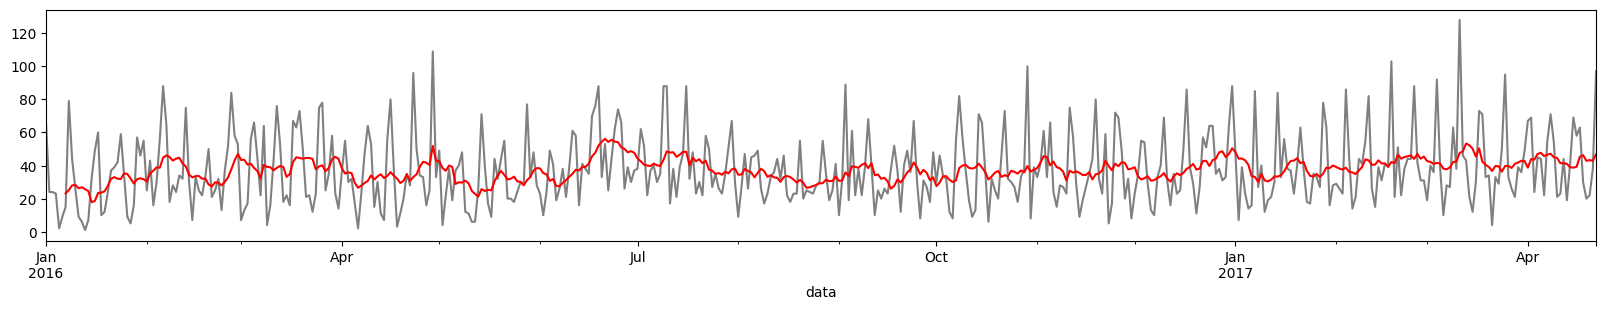

In [40]:
dados['Chimi & Churri'].plot(color ='gray', figsize=(20,3))
dados['Chimi & Churri_MM7'].plot(color ='red', figsize=(20,3))

<Axes: xlabel='data'>

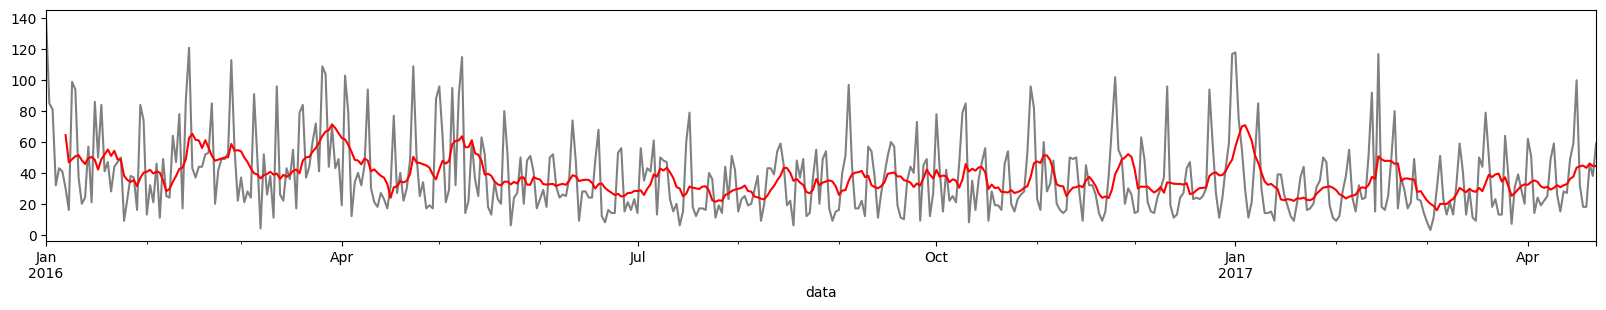

In [41]:
dados['Assa Frão'].plot(color ='gray', figsize=(20,3))
dados['Assa Frão_MM7'].plot(color ='red', figsize=(20,3))

In [42]:
# Conseguimos alanisar algumas tendências com a média móvel, como por exemplo:
# * A média móvel do Chimi & Churri apresenta um crescimento mais acentuado ao longo do tempo em comparação com a do Assa Frão. 
# Com a media movel, conseguimos suavizar as flutuações diárias e observar tendências mais claras no número de clientes.
# A visualizacao mensal é muito erratica devido a variações diárias significativas, enquanto a média móvel de 7 dias oferece uma perspectiva mais estável e confiável das tendências ao longo do tempo.

## 03. Detectando anomalias

In [43]:
# Como se trata de datas, pode acontecer der anomalias com datas comemotrativas, feriados, etc.
# para obersavamos melhor vamos inetegrarrar essas informações ao dataset

In [44]:
dados.index.day_name(locale= 'pt_BR')

Index(['Sexta-feira', 'Sábado', 'Domingo', 'Segunda-feira', 'Terça-feira',
       'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo',
       ...
       'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo', 'Segunda-feira',
       'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'],
      dtype='object', name='data', length=478)

In [45]:
dados['Dia da semana'] = dados.index.day_name(locale= 'pt_BR')
dados

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7,Dia da semana
data,,,,,,
2016-01-01,65.0,139.0,204.0,NaN,NaN,Sexta-feira
2016-01-02,24.0,85.0,109.0,NaN,NaN,Sábado
2016-01-03,24.0,81.0,105.0,NaN,NaN,Domingo
2016-01-04,23.0,32.0,55.0,NaN,NaN,Segunda-feira
2016-01-05,2.0,43.0,45.0,NaN,NaN,Terça-feira
...,...,...,...,...,...,...
2017-04-18,30.0,18.0,48.0,46.285714,44.714286,Terça-feira
2017-04-19,20.0,18.0,38.0,42.857143,43.285714,Quarta-feira
2017-04-20,22.0,46.0,68.0,43.285714,46.000000,Quinta-feira


In [52]:
data_comemorativas = pd.read_csv(r'C:\Users\init\Documents\GitHub\Estudos-praticos\SERIES\data\datas_comemorativas.csv')
data_comemorativas.head()

,data,feriado
0,1/1/2016,Ano novo
1,2/14/2016,Dia dos namorados
2,3/25/2016,Sexta-feira santa
3,3/27/2016,Pascoa
4,3/28/2016,Domingo de pascoa


In [53]:
# Transformando a coluna de data para datetime e definindo como índice

data_comemorativas['data'] = pd.to_datetime(data_comemorativas['data'])
data_comemorativas = data_comemorativas.set_index('data', drop=True)
data_comemorativas

,feriado
data,
2016-01-01,Ano novo
2016-02-14,Dia dos namorados
2016-03-25,Sexta-feira santa
2016-03-27,Pascoa
2016-03-28,Domingo de pascoa
2016-05-08,Dia das maes
2016-06-19,Dia dos pais
2016-10-31,Halloween
2016-11-25,Black Friday


In [54]:
# temos que unir esses dois datasets

dados_completos = pd.merge(dados, data_comemorativas, how='left', left_index=True, right_index=True)
dados_completos

,Chimi & Churri,Assa Frão,Total,Chimi & Churri_MM7,Assa Frão_MM7,Dia da semana,feriado
data,,,,,,,
2016-01-01,65.0,139.0,204.0,NaN,NaN,Sexta-feira,Ano novo
2016-01-02,24.0,85.0,109.0,NaN,NaN,Sábado,NaN
2016-01-03,24.0,81.0,105.0,NaN,NaN,Domingo,NaN
2016-01-04,23.0,32.0,55.0,NaN,NaN,Segunda-feira,NaN
2016-01-05,2.0,43.0,45.0,NaN,NaN,Terça-feira,NaN
...,...,...,...,...,...,...,...
2017-04-18,30.0,18.0,48.0,46.285714,44.714286,Terça-feira,NaN
2017-04-19,20.0,18.0,38.0,42.857143,43.285714,Quarta-feira,NaN
2017-04-20,22.0,46.0,68.0,43.285714,46.000000,Quinta-feira,NaN


In [55]:
# Agora iremos detectar os dados discrepantes atraves do Z SCORE
from scipy.stats import zscore

In [56]:
def detectar_outlier(coluna):
    dados_completos['zscore'] = zscore(dados_completos[coluna])
    anomalias = dados_completos[(dados_completos['zscore'] > 3)| (dados_completos['zscore'] < -3)]
    return anomalias [[coluna, 'zscore', 'Dia da semana','feriado']]

anomalias_chimi = detectar_outlier('Chimi & Churri')
anomalias_assa = detectar_outlier('Assa Frão')

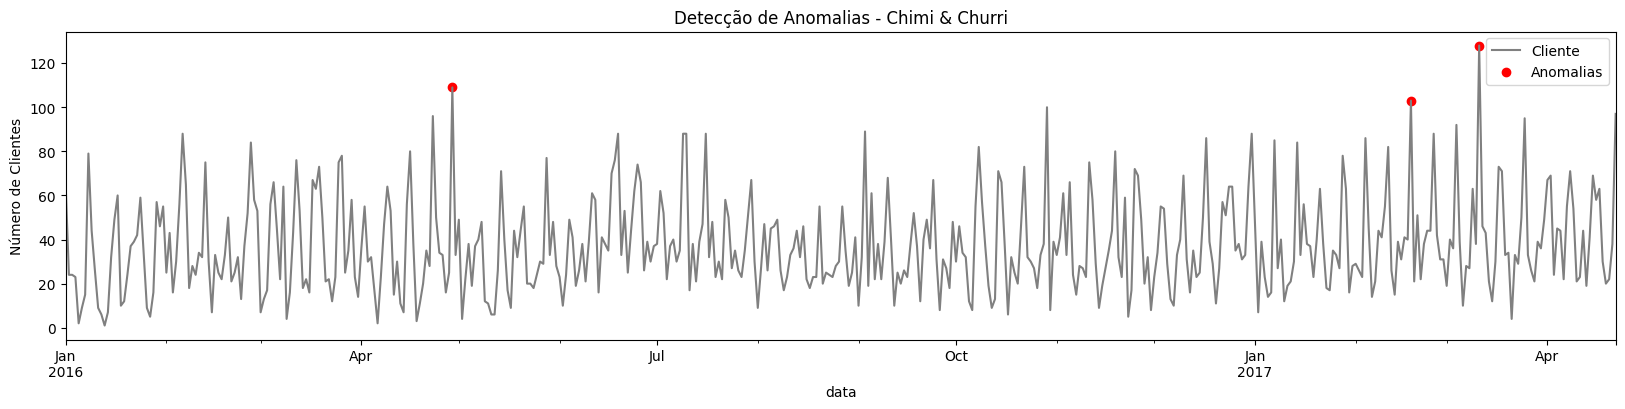

In [57]:
ax = dados_completos['Chimi & Churri'].plot(label = 'Cliente', color='gray', figsize=(20,4))
ax.scatter(anomalias_chimi.index.to_pydatetime(), anomalias_chimi['Chimi & Churri'], color='red', label='Anomalias')
ax.set_title('Detecção de Anomalias - Chimi & Churri')
ax.set_ylabel('Número de Clientes')
ax.legend()

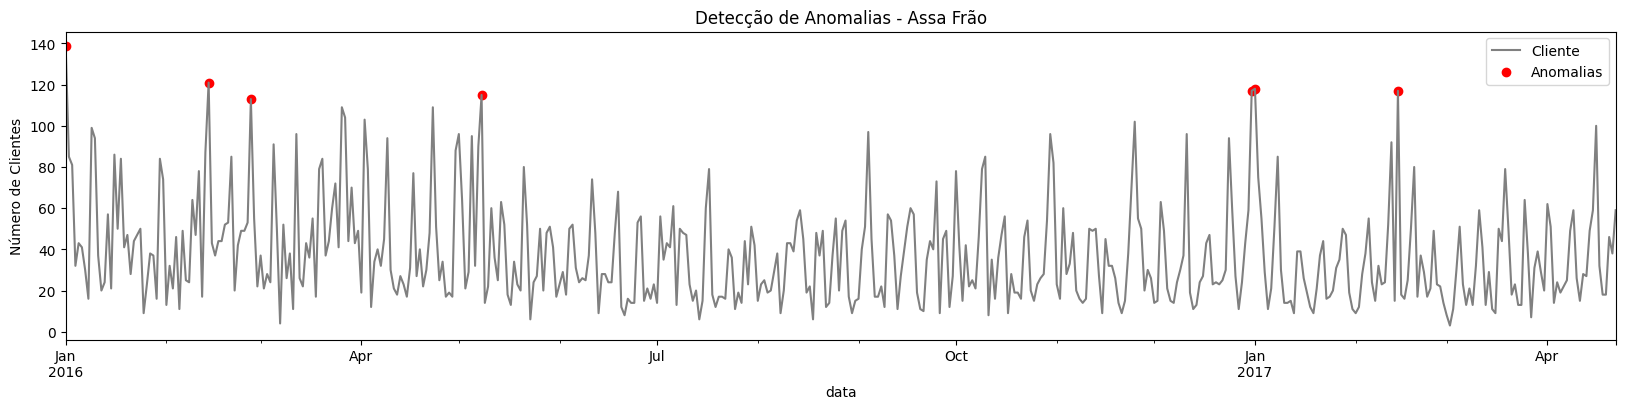

In [58]:
ax = dados_completos['Assa Frão'].plot(label = 'Cliente', color='gray', figsize=(20,4))
ax.scatter(anomalias_assa.index.to_pydatetime(), anomalias_assa['Assa Frão'], color='red', label='Anomalias')
ax.set_title('Detecção de Anomalias - Assa Frão')
ax.set_ylabel('Número de Clientes')
ax.legend()

In [59]:
## Descobrir quais datas são outiliers

anomalias_assa.sort_values(by='zscore',ascending=False)

,Assa Frão,zscore,Dia da semana,feriado
data,,,,
2016-01-01,139.0,4.119717,Sexta-feira,Ano novo
2016-02-14,121.0,3.387830,Domingo,Dia dos namorados
2017-01-01,118.0,3.265848,Domingo,Ano novo
2017-02-14,117.0,3.225188,Terça-feira,Dia dos namorados
2016-12-31,117.0,3.225188,Sábado,Vespera de ano novo
2016-05-08,115.0,3.143867,Domingo,Dia das maes
2016-02-27,113.0,3.062546,Sábado,NaN


In [60]:
anomalias_chimi.sort_values(by='zscore',ascending=False)

,Chimi & Churri,zscore,Dia da semana,feriado
data,,,,
2017-03-11,128.0,4.229021,Sábado,NaN
2016-04-29,109.0,3.341612,Sexta-feira,NaN
2017-02-18,103.0,3.061377,Sábado,NaN


## 04. Decomposição de uma série temporal

Text(0.5, 0.98, 'Análise de Autocorrelação - Chimi & Churri')

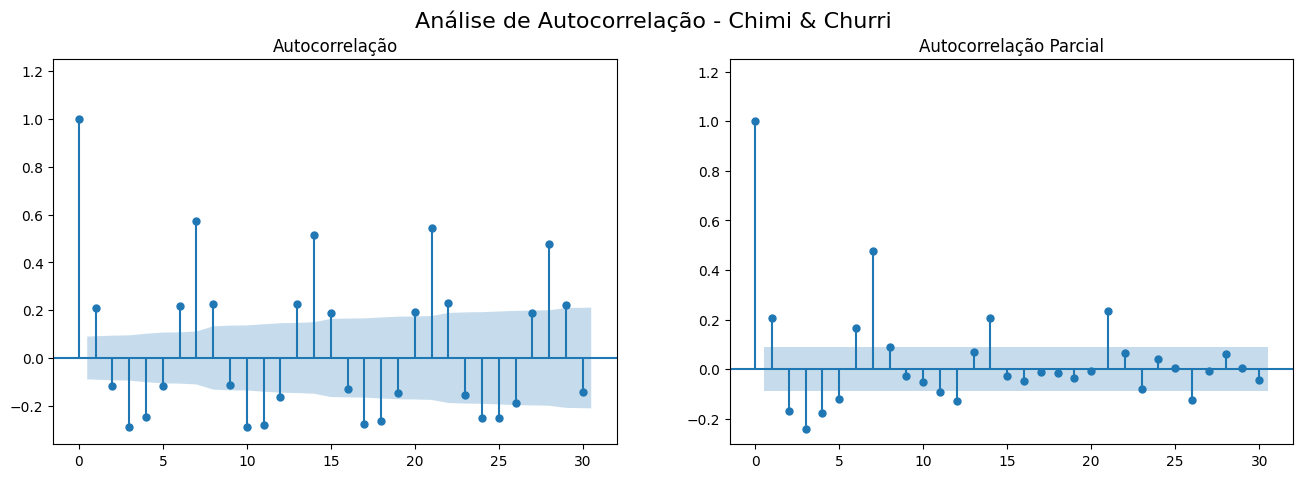

In [61]:
# Visualizando autocorrelação
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, axes = plt.subplots(1, 2, figsize =(16, 5))
plot_acf(dados_completos['Chimi & Churri'], lags = 30, title='Autocorrelação', auto_ylims=True, ax=axes[0])

plot_pacf(dados_completos['Chimi & Churri'], lags = 30, title='Autocorrelação Parcial', auto_ylims=True, ax=axes[1])
plt.suptitle('Análise de Autocorrelação - Chimi & Churri', fontsize=16)


# ACF, Dia 01 sempre 1.0, em diante os dias de hoje tem relação com o dia anterior ?
# Pontos que estão fora da margem inidica estatisticamente autocorrelção com dias anteriores

Text(0.5, 0.98, 'Análise de Autocorrelação - Assa Frão')

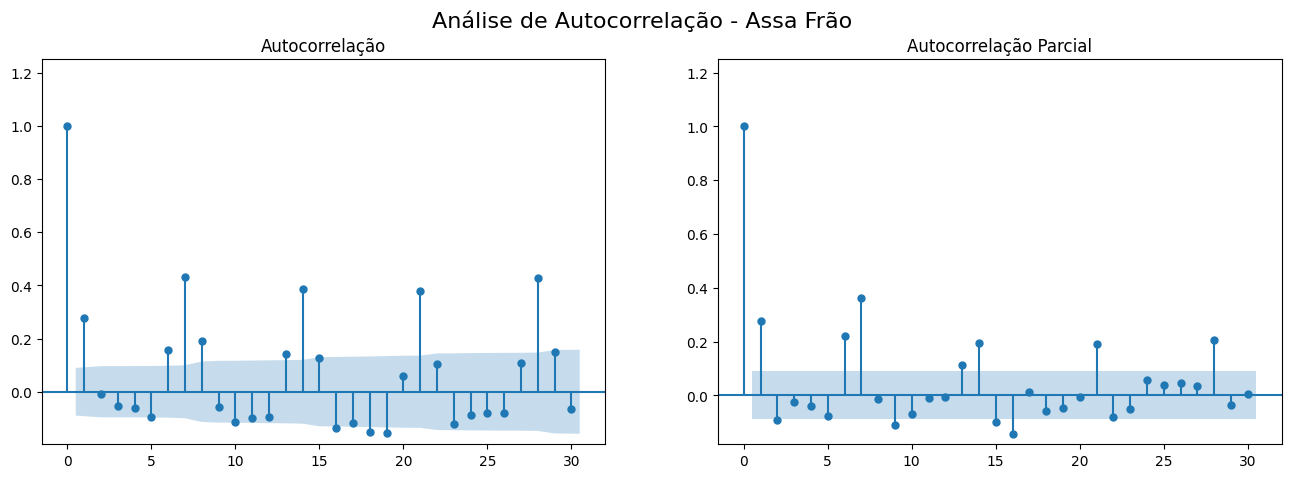

In [62]:
fig, axes = plt.subplots(1, 2, figsize =(16, 5))
plot_acf(dados_completos['Assa Frão'], lags = 30, title='Autocorrelação', auto_ylims=True, ax=axes[0])

plot_pacf(dados_completos['Assa Frão'], lags = 30, title='Autocorrelação Parcial', auto_ylims=True, ax=axes[1])
plt.suptitle('Análise de Autocorrelação - Assa Frão', fontsize=16)


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao_chimi = seasonal_decompose(dados_completos['Chimi & Churri'])

In [64]:
decomposicao_chimi.trend

data
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04    23.142857
2016-01-05    25.142857
                ...    
2017-04-18    42.857143
2017-04-19    46.857143
2017-04-20          NaN
2017-04-21          NaN
2017-04-22          NaN
Name: trend, Length: 478, dtype: float64

In [65]:
decomposicao_chimi.seasonal

data
2016-01-01     8.127744
2016-01-02    32.127744
2016-01-03     4.910260
2016-01-04   -11.870344
2016-01-05   -10.798915
                ...    
2017-04-18   -10.798915
2017-04-19   -13.216982
2017-04-20    -9.279506
2017-04-21     8.127744
2017-04-22    32.127744
Name: seasonal, Length: 478, dtype: float64

In [66]:
decomposicao_chimi.resid

data
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04    11.727487
2016-01-05   -12.343942
                ...    
2017-04-18    -2.058228
2017-04-19   -13.640161
2017-04-20          NaN
2017-04-21          NaN
2017-04-22          NaN
Name: resid, Length: 478, dtype: float64

In [67]:
## Visualizando a decompisção da serie temporal


def plot_decomposicao(decomposicao, title):
    fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True, figsize=(20,8))
    decomposicao.observed.plot(ax = axes[0], title = 'Dados observados')
    decomposicao.trend.plot(ax = axes[1], title = 'Tendência')
    decomposicao.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
    decomposicao.resid.plot(ax = axes[3], title = 'Resíduos')
    fig.suptitle(title)
    plt.show

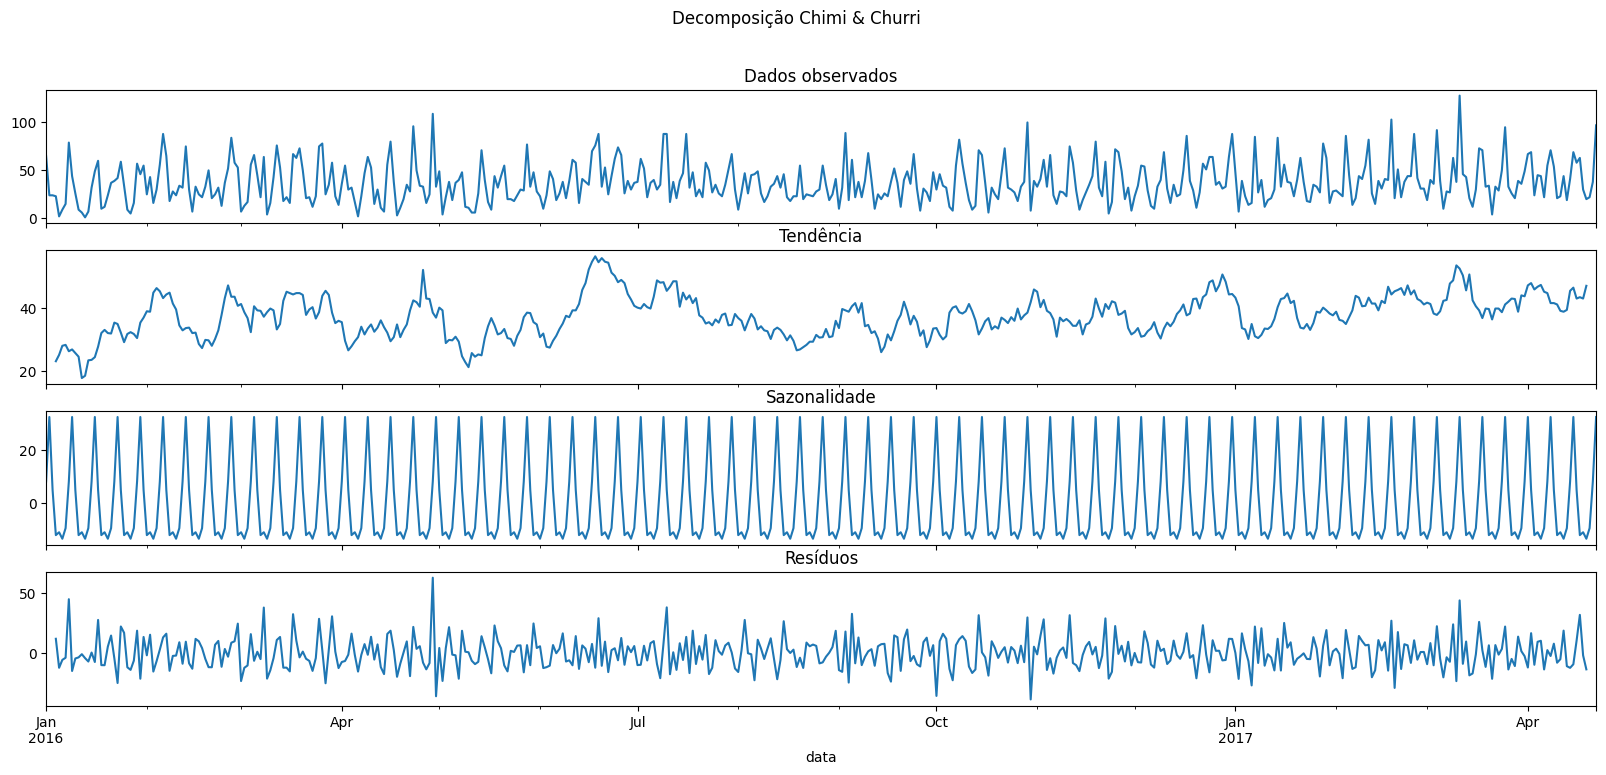

In [68]:
plot_decomposicao(decomposicao_chimi, 'Decomposição Chimi & Churri')

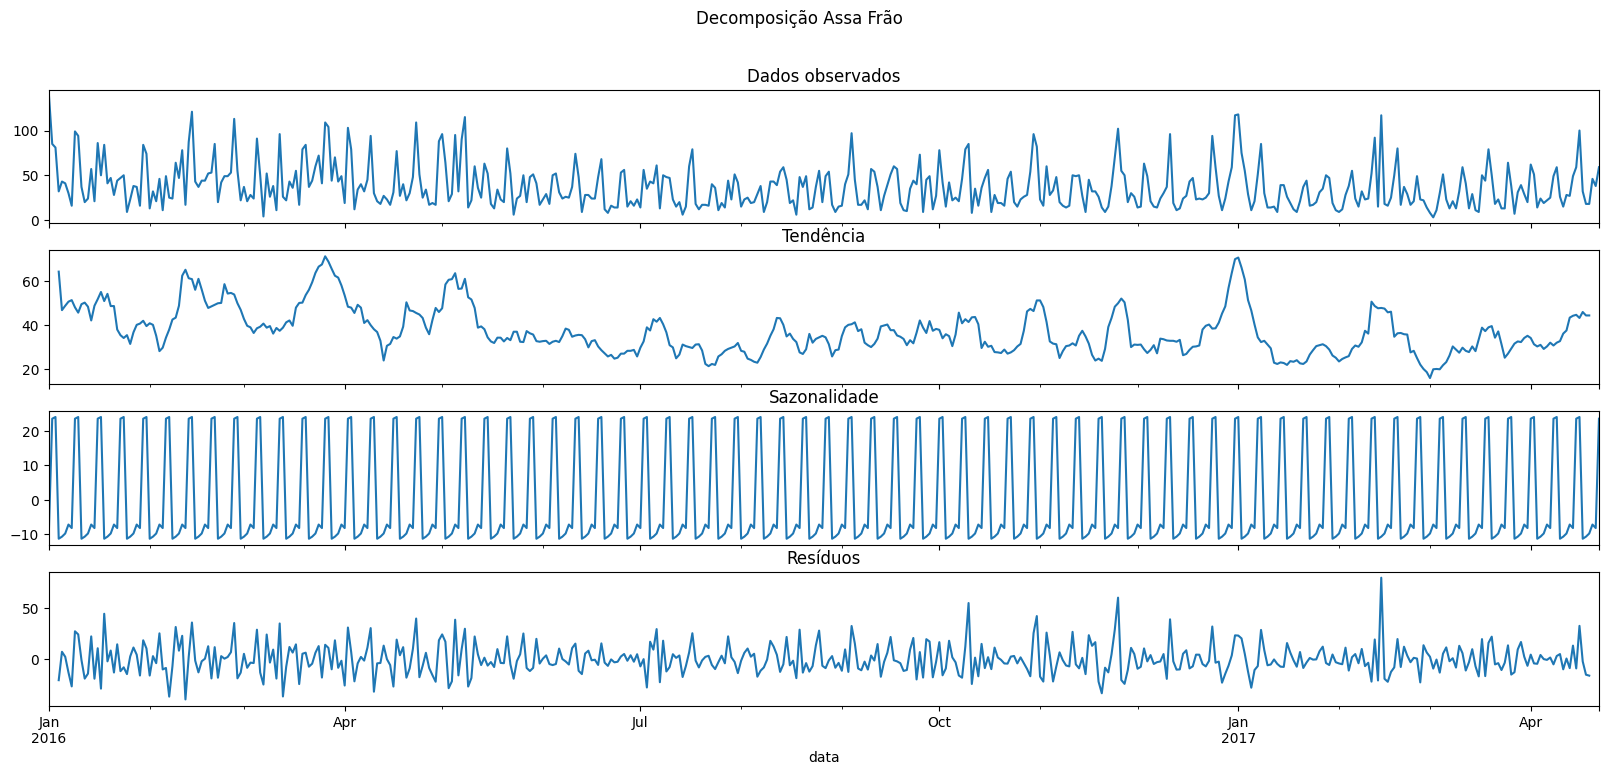

In [69]:
decomposicao_assa = seasonal_decompose(dados_completos['Assa Frão'])
plot_decomposicao(decomposicao_assa, 'Decomposição Assa Frão')

In [70]:
# Checando anomalias de acordo com residuos
import numpy as np

In [71]:
# Se o valor abs da decomposição for maior que 2,5 desvio padrão da mesma serie temporal, vamos armazenar em uma variavel

anomalias_resid_chimi = np.where(np.abs(decomposicao_chimi.resid) > 2.5*np.std(decomposicao_chimi.resid))
anomalias_resid_chimi

(array([  7,  67, 119, 120, 191, 274, 303, 435]),)

In [72]:
anomalias_resid_chimi = dados_completos.iloc[anomalias_resid_chimi][['Chimi & Churri', 'Dia da semana', 'feriado']]
anomalias_resid_chimi

,Chimi & Churri,Dia da semana,feriado
data,,,
2016-01-08,79.0,Sexta-feira,NaN
2016-03-08,64.0,Terça-feira,NaN
2016-04-29,109.0,Sexta-feira,NaN
2016-04-30,33.0,Sábado,NaN
2016-07-10,88.0,Domingo,NaN
2016-10-01,30.0,Sábado,NaN
2016-10-30,8.0,Domingo,NaN
2017-03-11,128.0,Sábado,NaN


In [73]:
anomalias_resid_assa = np.where(np.abs(decomposicao_assa.resid) > 2.5*np.std(decomposicao_assa.resid))
anomalias_resid_assa

(array([ 17,  42, 113, 125, 283, 304, 329, 345, 410]),)

In [74]:
anomalias_resid_assa = dados_completos.iloc[anomalias_resid_assa][['Assa Frão', 'Dia da semana', 'feriado']]
anomalias_resid_assa

,Assa Frão,Dia da semana,feriado
data,,,
2016-01-18,84.0,Segunda-feira,NaN
2016-02-12,17.0,Sexta-feira,NaN
2016-04-23,109.0,Sábado,NaN
2016-05-05,95.0,Quinta-feira,NaN
2016-10-10,85.0,Segunda-feira,NaN
2016-10-31,82.0,Segunda-feira,Halloween
2016-11-25,102.0,Sexta-feira,Black Friday
2016-12-11,96.0,Domingo,NaN
2017-02-14,117.0,Terça-feira,Dia dos namorados


C:\Users\init\AppData\Local\Temp\ipykernel_3516\2453363268.py:3: UserWarning:

This axis already has a converter set and is updating to a potentially incompatible converter



<function matplotlib.pyplot.show(close=None, block=None)>

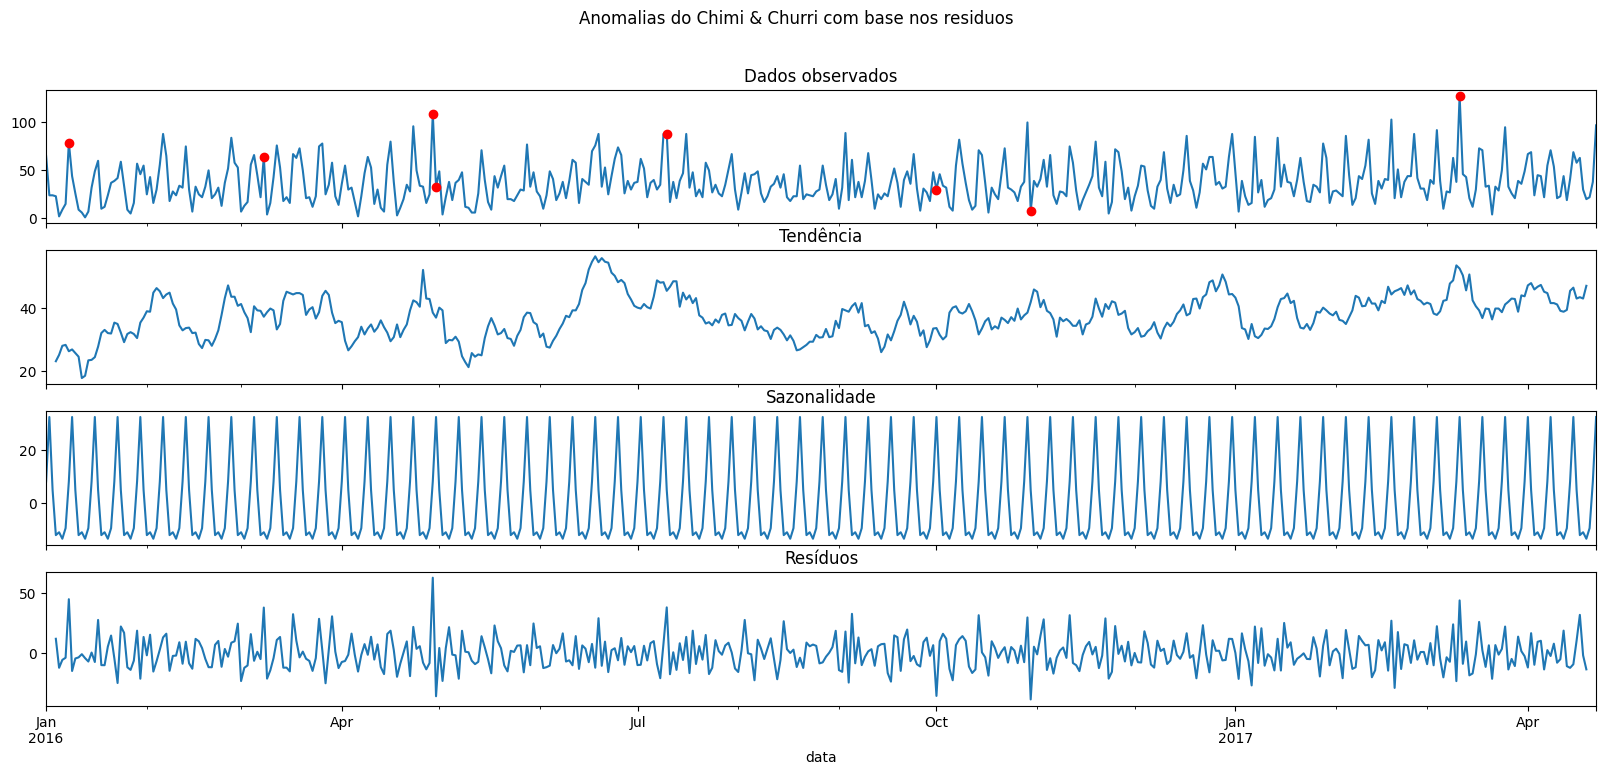

In [75]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True, figsize=(20,8))
decomposicao_chimi.observed.plot(ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_chimi.index, anomalias_resid_chimi['Chimi & Churri'], color='red', marker='o', linestyle='', label = 'Anomalias')
decomposicao_chimi.trend.plot(ax = axes[1], title = 'Tendência')
decomposicao_chimi.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
decomposicao_chimi.resid.plot(ax = axes[3], title = 'Resíduos')
fig.suptitle('Anomalias do Chimi & Churri com base nos residuos')
plt.show

C:\Users\init\AppData\Local\Temp\ipykernel_3516\3847745383.py:3: UserWarning:

This axis already has a converter set and is updating to a potentially incompatible converter



<function matplotlib.pyplot.show(close=None, block=None)>

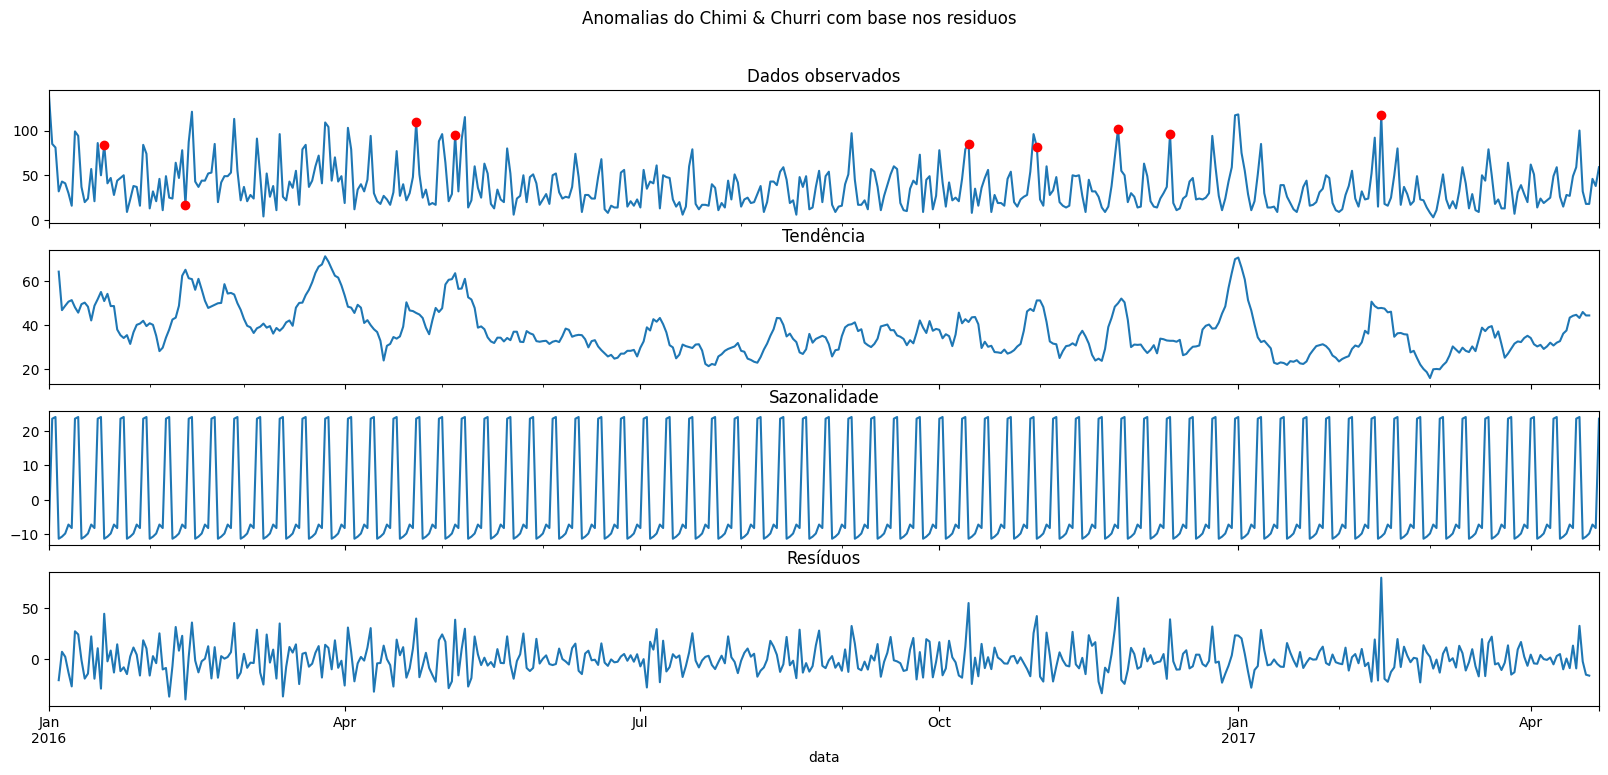

In [76]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex=True, figsize=(20,8))
decomposicao_assa.observed.plot(ax = axes[0], title = 'Dados observados')
axes[0].plot(anomalias_resid_assa.index, anomalias_resid_assa['Assa Frão'], color='red', marker='o', linestyle='', label = 'Anomalias')
decomposicao_assa.trend.plot(ax = axes[1], title = 'Tendência')
decomposicao_assa.seasonal.plot(ax = axes[2], title = 'Sazonalidade')
decomposicao_assa.resid.plot(ax = axes[3], title = 'Resíduos')
fig.suptitle('Anomalias do Chimi & Churri com base nos residuos')
plt.show

## 05. Previsão de series temporais

In [77]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [78]:
modelo_chimi = ExponentialSmoothing(dados_completos['Chimi & Churri'], seasonal = 'additive', seasonal_periods= 7, freq='D')
resultado_chimi = modelo_chimi.fit()
previsao_chimi = resultado_chimi.forecast(steps = 14)

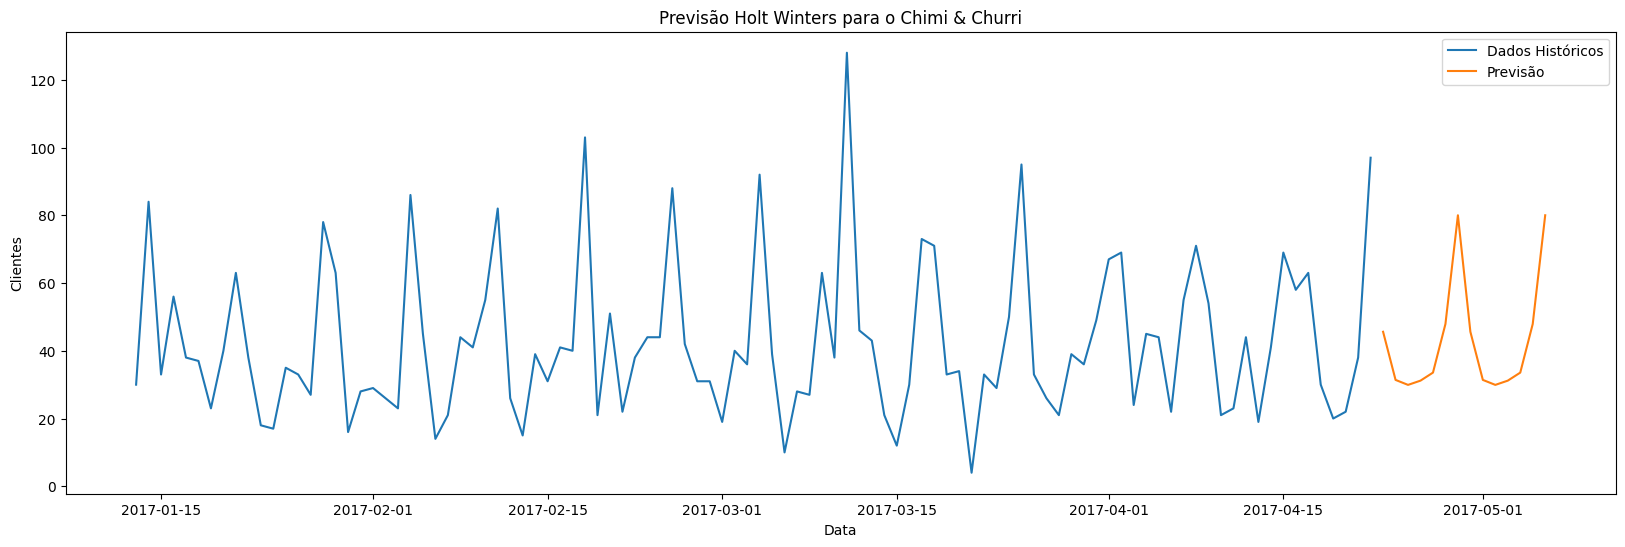

In [79]:
plt.figure(figsize=(20,6))
plt.plot(dados_completos['Chimi & Churri'].index[-100:], dados_completos['Chimi & Churri'].values[-100:], label='Dados Históricos')
plt.plot(previsao_chimi.index, previsao_chimi.values, label='Previsão')
plt.title('Previsão Holt Winters para o Chimi & Churri')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

In [80]:
modelo_assa = ExponentialSmoothing(dados_completos['Assa Frão'], seasonal = 'additive', seasonal_periods= 7, freq='D')
resultado_assa = modelo_assa.fit()
previsao_assa = resultado_assa.forecast(steps = 14)

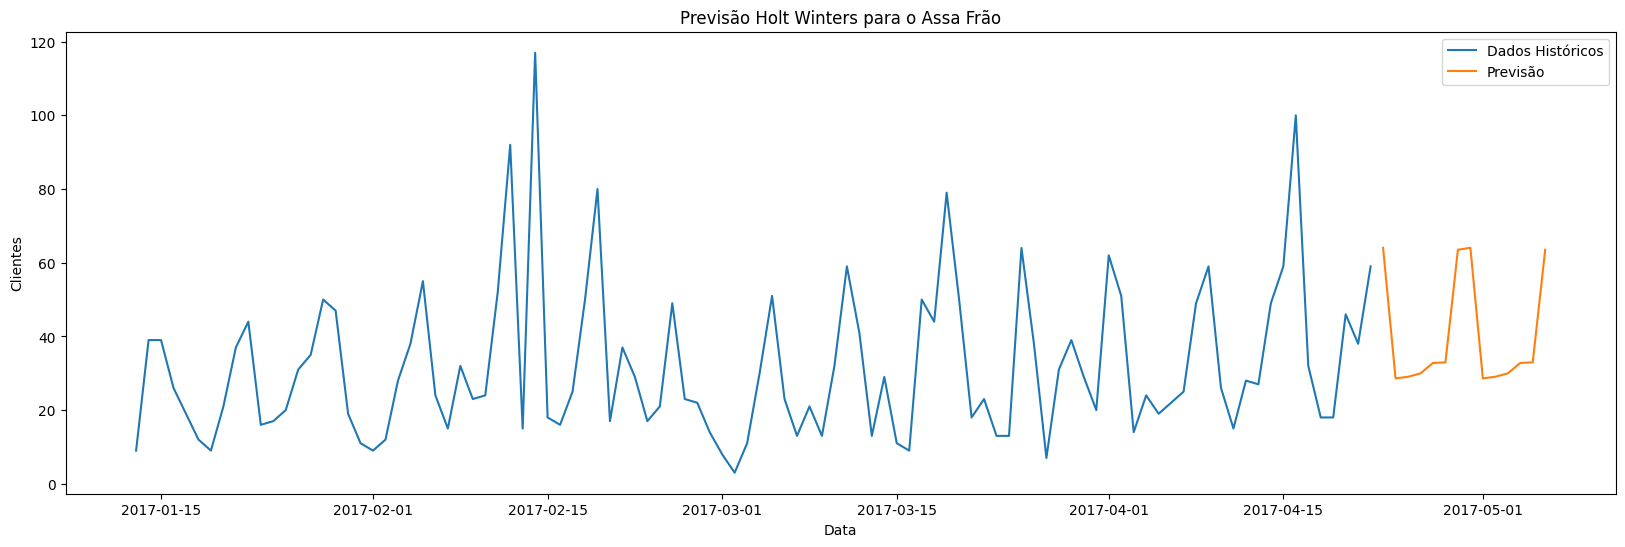

In [81]:
plt.figure(figsize=(20,6))
plt.plot(dados_completos['Assa Frão'].index[-100:], dados_completos['Assa Frão'].values[-100:], label='Dados Históricos')
plt.plot(previsao_assa.index, previsao_assa.values, label='Previsão')
plt.title('Previsão Holt Winters para o Assa Frão')
plt.xlabel('Data')
plt.ylabel('Clientes')
plt.legend();

In [82]:
# Sumarizando as previsões
tabela_previsao = pd.DataFrame()
tabela_previsao.index =  previsao_chimi.index
tabela_previsao['Previsão Chimi & Churri'] =  previsao_chimi.values
tabela_previsao['Previsão Assa Frão'] =  previsao_assa.values
tabela_previsao

,Previsão Chimi & Churri,Previsão Assa Frão
2017-04-23,45.613899,64.046399
2017-04-24,31.402816,28.615249
2017-04-25,29.931315,29.043939
2017-04-26,31.186735,29.964479
2017-04-27,33.556172,32.795301
2017-04-28,47.910348,32.953411
2017-04-29,80.011122,63.532794
2017-04-30,45.613899,64.046399
2017-05-01,31.402816,28.615249
2017-05-02,29.931315,29.043939


In [83]:
tabela_previsao = tabela_previsao.astype(int)
tabela_previsao

,Previsão Chimi & Churri,Previsão Assa Frão
2017-04-23,45,64
2017-04-24,31,28
2017-04-25,29,29
2017-04-26,31,29
2017-04-27,33,32
2017-04-28,47,32
2017-04-29,80,63
2017-04-30,45,64
2017-05-01,31,28
2017-05-02,29,29


In [85]:
# Criar em excel para enviar pro restaurante
tabela_previsao.to_excel('tabela previsao para os proximos 14 dias.xlsx', index=False)